# Signal processing 
## Application of signal processing methods to an earthquake

Firstly, following steps in instruction we achived to download data. Some essential informations about earthquake and station are shown in following tables.

Information about earthquake:

|Latitude |	Longitude|	Date and time|	Depth|	Magnitude|	Description	|
|--- |	---|	---|	---|	---|	---	|
|13.3836° N|	76.5555° E |		2007-08-15 23:40:58 UTC |	41.2 km|	Mww8.0|Near Coast of Peru|

Information about station:

|Station code |	Elevation|	Station name	| Data center | 
|--- |	---|	---|	---|	
|PMSA |		40 m|  Palmer Station | IRISDMC | 

Then, the next step is to start analysing data. Following values will be used for further steps.


|Sampling rate |Quantification  |	P waves arrival	| S waves arrival |  Distance |
|--- |	---|	---|	---|	---|
|20 sps | 144000 |  +9m 5s| +16m 27s | 52.11° |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal # for filters

# 2. Data analysis
## 2.1.Time domain plot

__1) Using the sampling rate indicated on the first row of the seismogram file, create the correct time
vector for your timeseries. The first element of the time vector is 0 (meaning that all the times
are relative to the origin time of the earthquake).__

Done

__2) Plot the seismogram timeseries (amplitude versus time). The amplitude is in “counts” (a value
proportional to ground velocity)__

Done

__3) Check that you see the P-wave and the S-wave at approximately the right time.__

Corresponding arrival time (see table above) for all kind of waves could be observed in seismogram easily due to lack of noise.

In [2]:
data=np.loadtxt("dataa.txt",skiprows=1)
data=data-np.mean(data) #to align seismogram to 0 it is going to be helpful in further steps
type(data) # to check format of array

numpy.ndarray

In [3]:
#distance in degree should be converted to kilometer in order to find time window of surface waves
D_degree=52
D_min=11
D=(D_degree*111139+D_min*1853)/1000
D

5799.611

Text(0.5, 1.0, 'Seismograph')

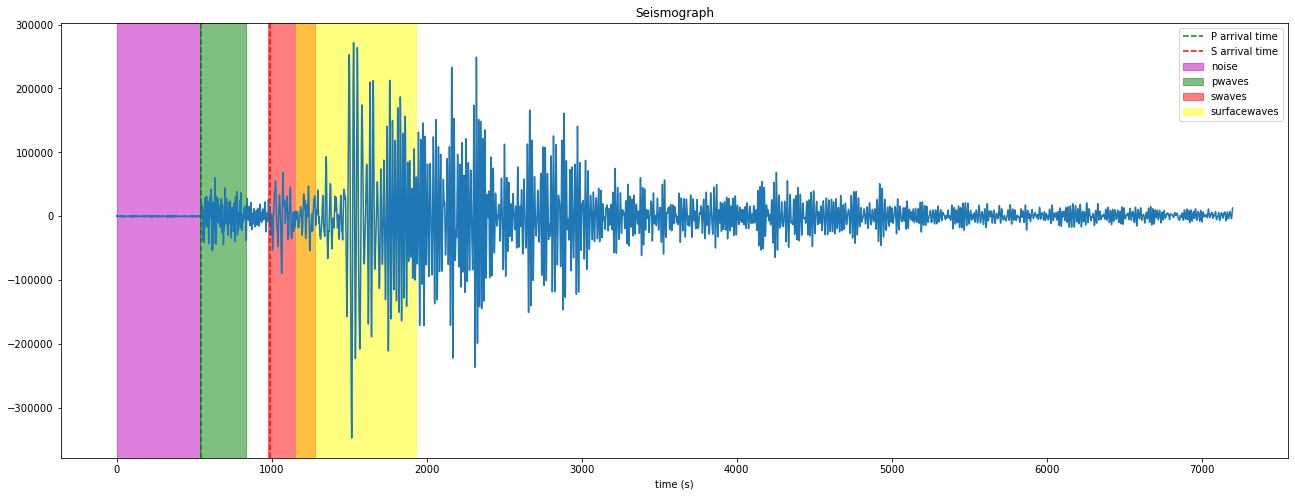

In [4]:
dt=1/20 #sampling rate 
N=144000 # number of points
t=np.arange(0,N)*dt  # answer to 1
plt.figure(figsize=(22,8))  
plt.plot(t,data)  # 2
plt.xlabel('time (s)')
plt.axvspan(0,535, alpha=0.5, color='m',label="noise")
plt.axvspan(535,835, alpha=0.5, color='green',label="pwaves")
plt.axvspan(977,1277, alpha=0.5, color='red',label="swaves")
plt.axvline(x=545,color="g", linestyle='--',label="P arrival time") 
plt.axvline(x=987, color="r",linestyle='--',label="S arrival time") 
plt.axvspan(D/5,D/3, alpha=0.5, color='yellow',label="surfacewaves")
plt.legend()
plt.title('Seismograph')

__4) Cut the seismogram in 4 pieces:__

With the help of information in tables above, required time intervals are distincted. Additionally, correctness of this numbers ( P&S waves arrival times and distance) was checked by the help of P and S wave arrival time chart to be sure.
Additionally, these intervals is indicated in seismograph above.

In [5]:
noise=data[(t<535)]
pwave=data[(t>535)&(t<835)]
swave=data[(t>977)&(t<1277)]
surfacewave=data[(t>D/5)&(t<D/3)]

## 2.2 Amplitude spectrum

__1) Compute the amplitude spectrum for the noise, P-wave, S-wave and surface wave portions of
the seismogram.__

Done with the help of *Fast Fourier Transform libraries*.



In [6]:
import numpy.fft as fft

In [7]:
N=len(noise)
NOISE=fft.fft(noise)[0:int(N/2)]
freq_noise=fft.fftfreq(N,dt)[0:int(N/2)]

N=len(pwave)
PWAVE=fft.fft(pwave)[0:int(N/2)]
freq_pwave=fft.fftfreq(N,dt)[0:int(N/2)]

N=len(swave)
SWAVE=fft.fft(swave)[0:int(N/2)]
freq_swave=fft.fftfreq(N,dt)[0:int(N/2)]

N=len(surfacewave)
SURFACEWAVE=fft.fft(surfacewave)[0:int(N/2)]
freq_surfacewave=fft.fftfreq(N,dt)[0:int(N/2)]

__2) Plot these amplitude spectra on a log-log scale with a correct frequency vector. You need to
divide each amplitude spectrum by the number of points of each sub-timeseries in order to
compare them properly. It is recommended to overlay the 4 amplitude spectra on a single plot.__

Done

Text(0.5, 0, 'frequency (Hz)')

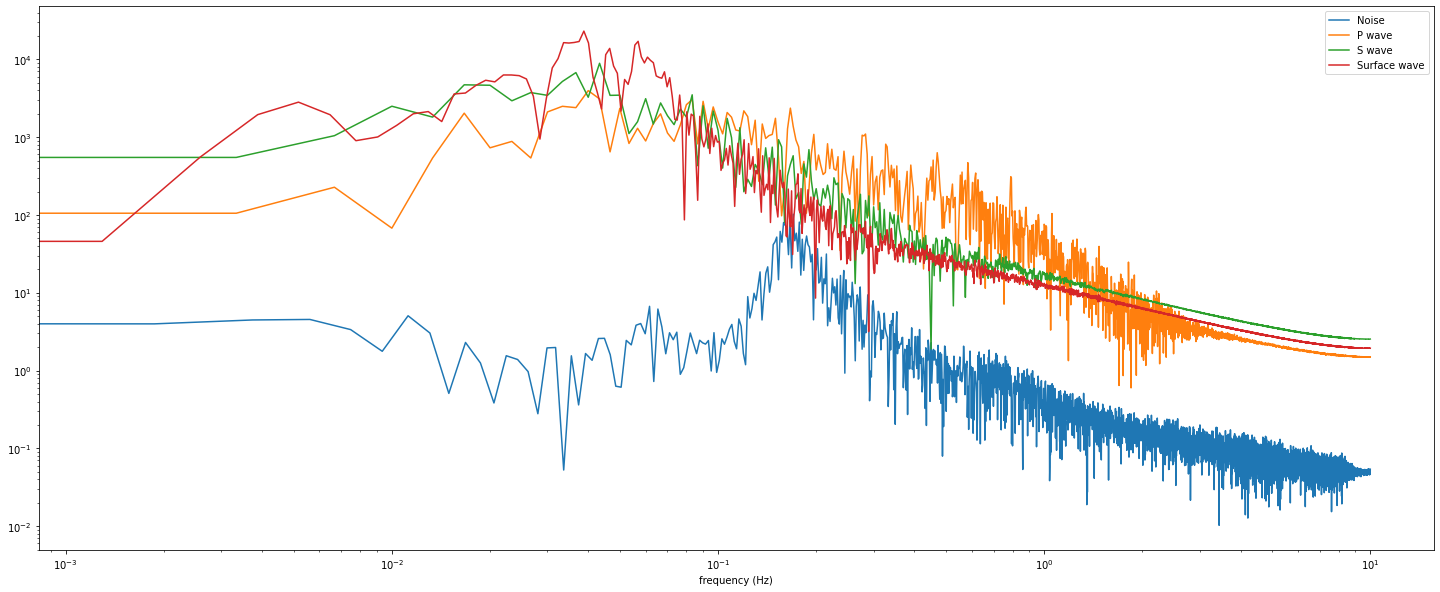

In [8]:
plt.figure(figsize=(25,10))

plt.loglog(freq_noise,np.abs(NOISE)/len(noise), label="Noise")
plt.loglog(freq_pwave,np.abs(PWAVE)/len(pwave), label="P wave")
plt.loglog(freq_swave,np.abs(SWAVE)/len(swave), label="S wave")
plt.loglog(freq_surfacewave,np.abs(SURFACEWAVE)/len(surfacewave),  label="Surface wave")

plt.legend()

plt.xlabel('frequency (Hz)')

__3) Indicate in which frequency ranges the amplitude of the P-wave, S-wave and Surface waves are
higher than the noise.__

In terms of this signal, amplitude of noise is smallest in all frequencies and this is rare but makes senses because in seismogram plot above it is clearly observed that the signal has just slight noise and p wave arrival time could be clearly distincted. This means our data has high quality.

__4) Indicate in which frequency range the amplitude of the surface waves is higher than the
amplitude of the P and S waves__

(We hid noise plot to see difference more clearly) \
In comparision of P&S waves and surface waves, for frequencies which is smaller than 0.07 Hz amplitude of surface waves higher than P and S waves.

__5) Indicate the frequency resolution and its link with the sampling rate and/or the length of the
dataset.__ 

As sampling rate ($dt$) means to be one over samples per second, we can easel create link between it and  number of points ($N$) to calculate duration ($T=N \cdot dt $). 
Then this relation is applied to frequency resolution to achieve formula below.
Frequency resolution is expressed by $ \delta $f and its link with the sampling rate and the length of the dataset is:  
$$ \delta f=\frac{1}{T}=\frac{1}{N \cdot dt}$$ 

From calculations below, $ \delta $f is calculated as $1.4 \cdot 10^{-4}$ and it refers the frequency difference which is below this value can not be observed  in frequency domain. However, several approaches exist which may improve frequency resolution artificially.

In [9]:
N=144000 # value assigned to N has changed in previous coloumns
df = 1/(N*dt)

print("Frequency resolution: ",df)
print("Whether 2 formulas give same result:", 1/(120*60)==df )

Frequency resolution:  0.0001388888888888889
Whether 2 formulas give same result: True


## 2.3 Filtering

__1) Apply a 2nd order Butterworth high-pass filter with a cut-off frequency at 0.3Hz to the complete
seismogram and plot the filtered seismogram. Which type of waves do you enhance with this
filter (comparing to the unfiltered seismogram) ? Explain why__

(Calculations and plotting were done in following coloumn) \
In plot which compares unfiltered and filtered (high pass) data, P waves are observed more intensely than S and surface waves. The aim of high pass filters is elimanting the signals which is lower than certain cutoff frequency (0.3 in our case). 
Moreover, it means to have only signals for higher frequencies and looking the amplitude spectrum in frequency domain above, it is clearly observed P waves are more intense 
for that particular interval. As a result, it could be specifically utilized to 
distinguish p wave signals.

Text(0, 0.5, 'Amplitude')

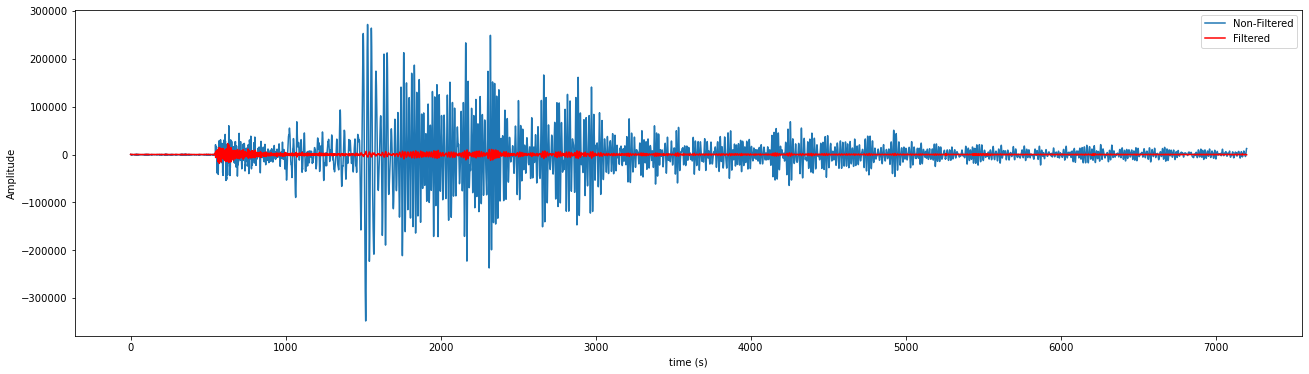

In [21]:
#  Butterworth high-pass filter
order=2
cutoff_freq = 0.3 # cut-off frequency of the high-pass filter in Hz
nyquist_frequency = 1/(2*dt) # Nyquist frequency = sampling frequency / 2

b, a =signal.butter(order,cutoff_freq/nyquist_frequency, btype="highpass") 

# Filter data
sismo_high = signal.lfilter(b,a,data)

# Plot filtered data alongside with raw data to see difference clearly
plt.figure(figsize=(22,6))
plt.plot(t,data,label='Non-Filtered')
plt.plot(t,sismo_high,color='r',label='Filtered')  #we did not like default second colour - orange
plt.legend()

plt.xlabel('time (s)')
plt.ylabel('Amplitude')

__2) Apply a 2nd order Butterworth low-pass filter with a cut-off frequency at 0.01Hz to the complete
seismogram and plot the filtered seismogram. Which type of waves do you enhance with this
filter ?__

(Calculations and plotting were done in following coloumn) \
 The aim of low pass filtering 
is eliminating the signals higher than cutoff frequency. Considering the plot of amplitude spectrum frequency domain,
For that particular frequency range, surface waves have highest amplitude, while P waves are lowest. 
So that, after filtering, surface waves correspond strongest interval. S waves are weaker but still distinguishable, and lastly, P waves exist slightly.

Text(0.5, 0, 'time (s)')

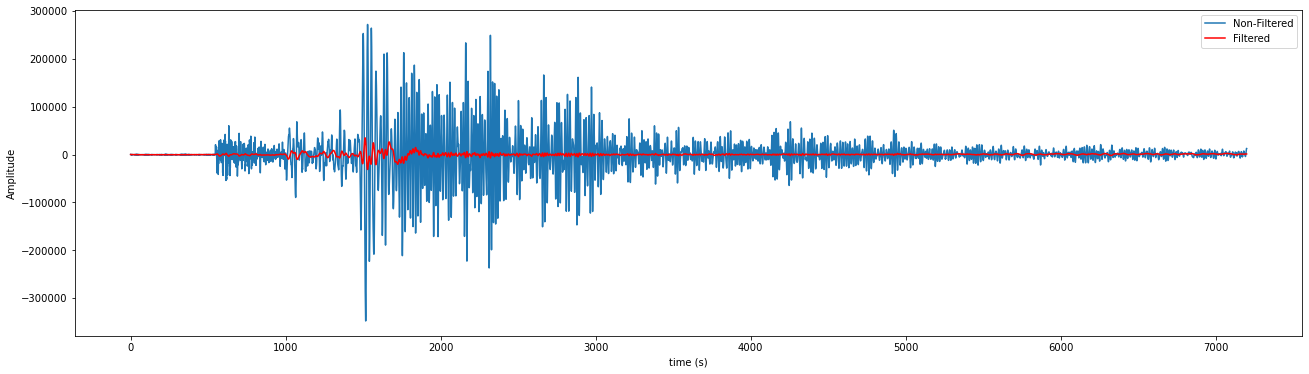

In [22]:
# Creating the filter
order=2
cutoff_freq = 0.01 # cut-off frequency of the low-pass filter in Hz
nyquist_frequency = 1/(2*dt) # Nyquist frequency = sampling frequency / 2

b,a=signal.butter(order,(cutoff_freq/nyquist_frequency),btype='low')

# Filter data
sismo_low = signal.lfilter(b,a,data)

# Plot filtered data alongside with raw data to see difference more clearly
plt.figure(figsize=(22,6))
plt.plot(t,data,label='Non-Filtered') 
plt.plot(t,sismo_low,color='r',label='Filtered')
plt.legend()

plt.ylabel('Amplitude')
plt.xlabel('time (s)')

## 2.4.Displacement spectrum
__1) The amplitude unit of the seismogram that you downloaded is proportional to the ground
velocity. Represent the amplitude spectrum of the displacement for the P-wave portion. Remember that displacement is the integral of velocity, and that integration is very easy in the
Fourier domain …__

As far as we understood, first of all, 
it is required to find velocity spectrum and we achieve to it with dividing __distance__ between 
earthquake epicenter and station to __time window__, which corresponds P wave portion. Then, obtained velocity spectrum has undergone fourier transform, integral in other terms, and as the last step, is plotted with frequency domain 
in logarithmic scale.

[10.84039439 10.83938137 10.83836853 ...  6.94688986  6.94647383
  6.94605785]


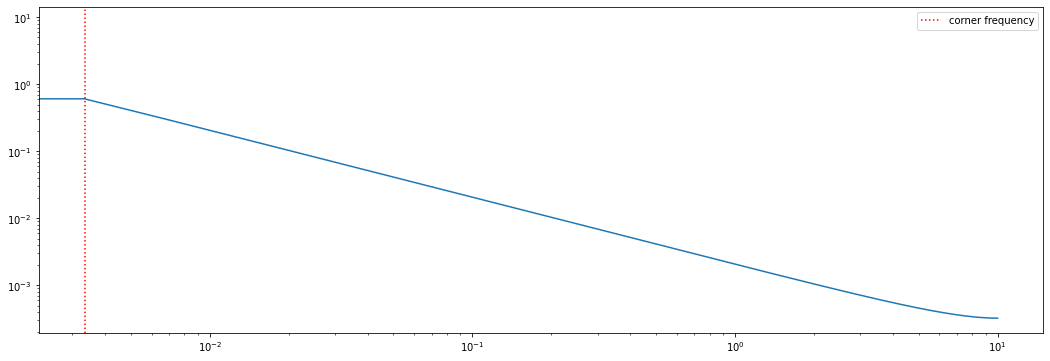

In [12]:
time_p=np.arange(535,835,dt) #timespan of p wave portion
velo_p= D/time_p    #conventional formula to calculate velocity
print(velo_p) #to be sure type of velo_p

#finding integral of velo_p array with the help of fourier transform
N = len(velo_p)  
VELO = fft.ifft(velo_p)[0:int(N/2)]
f_w = fft.fftfreq(N,dt)[0:int(N/2)]
plt.figure(figsize=(18,6))
plt.loglog(f_w,np.abs(VELO))
#plt.xlim(0.0001,0.01)
plt.axvline(x=3.35e-3,color='r', linestyle=':',label="corner frequency") 
plt.legend()

__2) The spectrum of the P-wave should look like the one sketched on figure 1. The frequency corner $f_c$ is linked to the surface S (in km$^{2}$
) of the fault that ruptured during the earthquake:__ 
$$ S = \frac{2.9 \alpha^2}{2 \pi f_c^2} $$


__where $ \alpha $ is the P wave velocity (in km/s) at the depth of the earthquake. Based on your displacement amplitude spectrum, estimate the corner frequency $f_c$ and the
rupture area of the earthquake you are studying.__

Plotted figure are not identical to showed figure in homework instructions, however, the point corresponds to corner frequency is distinguishable which lies in $ 3.35 \cdot 10^{-3} Hz$. We hope their is no major mistake in previous part, nevertheless we were not able to find any other way to achieve it despite further researches. <br>
Then, to find P wave velocity conventional velocity formula  ($ \alpha = \frac{D}{t} $) is used with dividing distance to p wave arrival time.
After acquiring the corner frequency ($f_{c}$) and P wave velocity ($\alpha$), surface of the fault that ruptured during the earthquake can be calculating with the formula above.

In [13]:
fc=3.35e-3 #corner frequency based on plot with the help of plt.xlim zooming
alpha=D/545  # P wave velocity
S=(2.9*(alpha**2))/(2*np.pi*(fc**2)) # Surface (in km2) of the fault that ruptured during the earthquake, calculated by the formula above
S

4657289.563667486

Surface of the fault that ruptured during the earthquake is approximately $4.5\cdot 10^{6} \ km^{2}$ based on our calculations. There is no accurant way to check trueness of that information. However, considering the earthquake happened in the boundary 
of Nazca and South America plates and giving area of Nazca is $15\cdot 10^{6} \ km^{2}$ it is likely to be correct.  

## 2.5 Comparison with a deep earthquake 
__1) Repeat sections 1 to 2.3 but with an earthquake having a depth higher than 400km (try to keep
the same station). <br>
What are the main differences between a shallow and a deep earthquake?__

We kept the same station: Palmer Station,Antarctica

Information about earthquake:

|Latitude |	Longitude|	Date and time|	Depth|	Magnitude|	Description	|
|--- |	---|	---|	---|	---|	---	|
|-23.87° N|	178.45° E |		2002-08-19 11:08:22 UTC |	649.9 km|	Mww7.7|South Of Fiji Islands|


|Sampling rate |Quantification  |	P waves arrival	| S waves arrival |  Distance |
|--- |	---|	---|	---|	---|
|20 sps | 144000 |  +11m 25s| +20m 57s | 79.27° |

Although we have tried to find an earthquake in the same plate boundary with first one, failed to do so.

Looking seismograph first significant difference is that there is no overlapping of swaves interval and surfacewaves interval. Reason for that is distance of epicenter. For farther epicenters, required time of surface waves are higher, knowing they have low velocity. 

Looking frequency domain, noise has not experienced change, it is anticipated because we kept the same station and so far noise levels stayed plateu. With regars to surface waves, they are significantly lower than P and S waves. Moreover, knowing this earthquake occured in deep depth as contrast to first one, it is expected to have surface waves in low amplitude.

As mentioned early, we would like to talk about causes of this earthquakes which is plate boundries. 
First earthquake happened in Peru which locates between Nazca and South America plate boundry where Nazca is subducted. Considering it has just depth of 41 km we simply call it as shallow earthquake. <br>
In terms of second earthquake, it happened in Fiji islands where it is more challenging to say causes of earthquake. Although we know Fiji is located on the Pacific Plate and the Indo-Australia Plate, zooming plate boundries in that region there are transform fault boundary and subduction zone, therefore, both could cause the earthquake. However, considering depth of earthquake ( 650 km ) it is very likely to be an deep-focus earthquake in subduction zone as shown in illustration below.

All mentioned datas are illustrated in cells below, additionally, a subduction zone illustration is added in bottom as supplimentary of our intrepretations.

In [14]:
data2=np.loadtxt("data22.txt",skiprows=1)
data2=data2-np.mean(data2) #to align seismogram to 0 it is going to be helpful in further steps

### Time domain plot

In [15]:
D_degree=79
D_min=27
D2=(D_degree*111139+D_min*1853)/1000

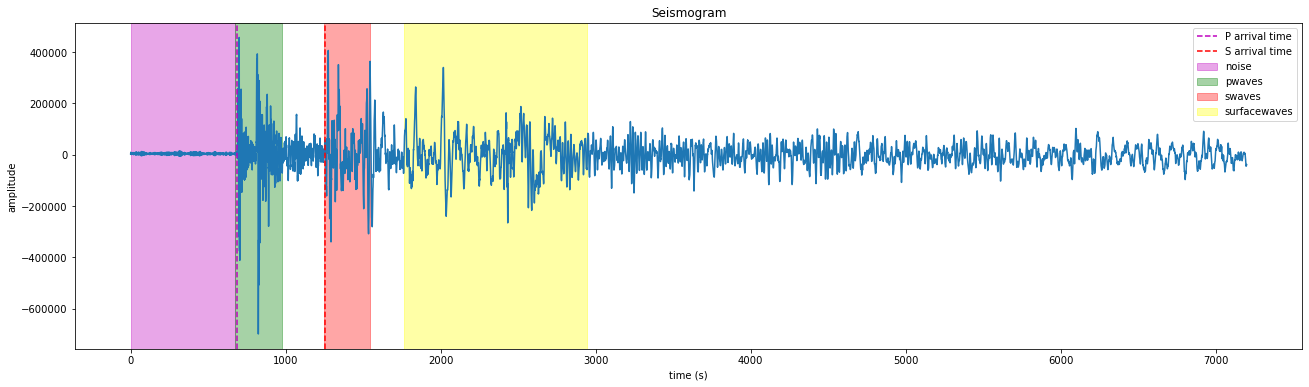

In [16]:
dt=1/20 #sampling rate 
N=144000 # number of points
t=np.arange(0,N)*dt  
plt.figure(figsize=(22,6))  

plt.plot(t,data2)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('Seismogram')
plt.axvline(x=685,color="m", linestyle='--',label="P arrival time") 
plt.axvline(x=1257, color="r",linestyle='--',label="S arrival time")
plt.axvspan(0,675, alpha=0.35, color='m',label="noise")
plt.axvspan(675,975, alpha=0.35, color='green',label="pwaves")
plt.axvspan(1247,1547, alpha=0.35, color='red',label="swaves")
plt.axvspan(D2/5,D2/3, alpha=0.35, color='yellow',label="surfacewaves")

plt.legend()

In [17]:
noise=data2[(t<675)]
pwave=data2[(t>675) & (t<975)]
swave=data2[(t>1247) & (t<1547)]
surfacewave=data2[(t>D2/5)&(t<D2/3)]


###  Amplitude spectrum

In [18]:
N=len(noise)
NOISE=fft.fft(noise)[0:int(N/2)]
freq_noise=fft.fftfreq(N,dt)[0:int(N/2)]

N=len(pwave)
PWAVE=fft.fft(pwave)[0:int(N/2)]
freq_pwave=fft.fftfreq(N,dt)[0:int(N/2)]

N=len(swave)
SWAVE=fft.fft(swave)[0:int(N/2)]
freq_swave=fft.fftfreq(N,dt)[0:int(N/2)]

N=len(surfacewave)
SURFACEWAVE=fft.fft(surfacewave)[0:int(N/2)]
freq_surfacewave=fft.fftfreq(N,dt)[0:int(N/2)]

Text(0.5, 0, 'Frequency (Hz)')

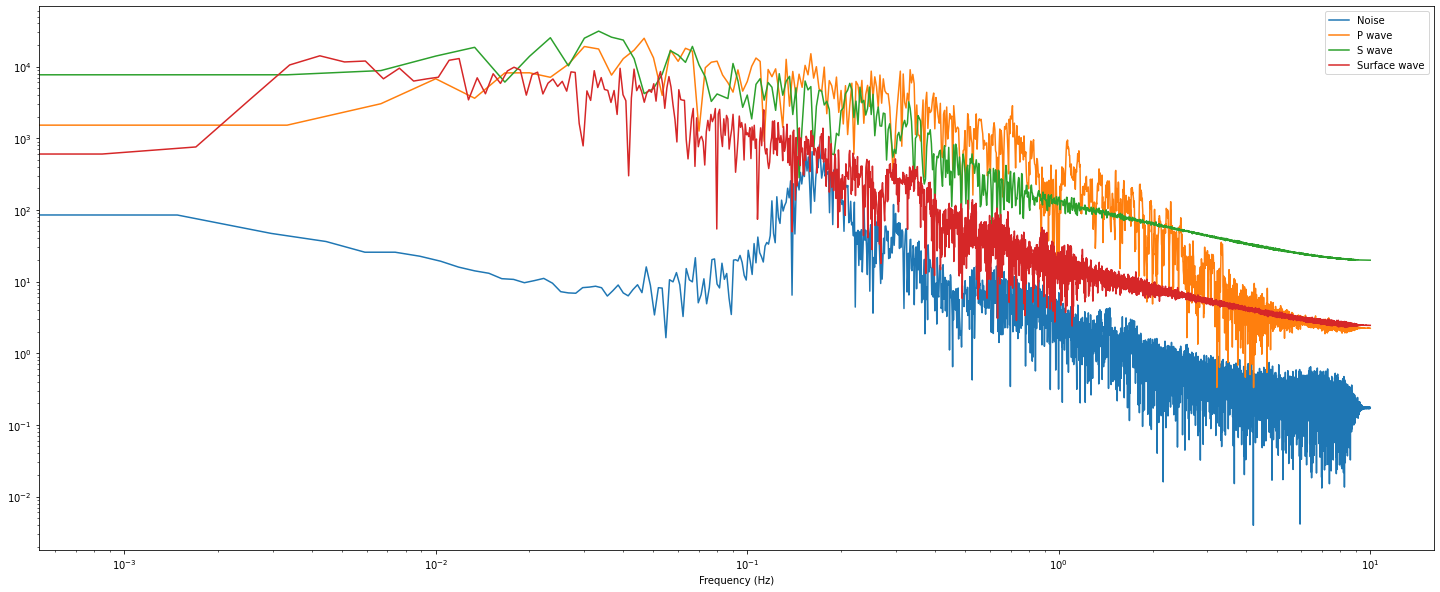

In [19]:
plt.figure(figsize=(25,10))
plt.loglog(freq_noise,np.abs(NOISE)/len(noise), label="Noise")
plt.loglog(freq_pwave,np.abs(PWAVE)/len(pwave), label="P wave")
plt.loglog(freq_swave,np.abs(SWAVE)/len(swave), label="S wave")
plt.loglog(freq_surfacewave,np.abs(SURFACEWAVE)/len(surfacewave), label="Surface wave")

plt.legend()

plt.xlabel('Frequency (Hz)')

<img src="subduction.gif">